In [ ]:
# colab.research.google.com
!pip install numpy
!pip install matplotlib
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)
import keras
import pandas as pd
import numpy as np
# import warnings
# warnings.filterwarnings('ignore')


2.18.0


In [ ]:
X_treino = np.array(
[
  [26,1.50], [19,1.70], [18,1.80], [17,1.30], [24,1.30],
  [17,1.20], [15,1.60], [16,1.40], [14,1.45], [23,1.70], [17,1.35],
  [18,1.90], [17,1.75], [25,1.80], [12,1.25], [22,1.50]
]
)
Y_treino = np.array( [
  [1,0,0],[0,1,0],[0,1,0],[0,0,1],[1,0,0],
  [0,0,1],[0,1,0],[0,0,1],[0,0,1],[1,0,0],[0,0,1],
  [0,1,0],[0,1,0],[1,0,0],[0,0,1],[1,0,0] ] )
X_teste = np.array( [ [25,1.67], [22,1.47], [23,1.88] ] )
Y_teste = np.array( [[1,0,0],[1,0,0],[1,0,0]] )
X_train = X_treino
X_test = X_teste

In [ ]:
X_train

array([[26.  ,  1.5 ],
       [19.  ,  1.7 ],
       [18.  ,  1.8 ],
       [17.  ,  1.3 ],
       [24.  ,  1.3 ],
       [17.  ,  1.2 ],
       [15.  ,  1.6 ],
       [16.  ,  1.4 ],
       [14.  ,  1.45],
       [23.  ,  1.7 ],
       [17.  ,  1.35],
       [18.  ,  1.9 ],
       [17.  ,  1.75],
       [25.  ,  1.8 ],
       [12.  ,  1.25],
       [22.  ,  1.5 ]])

In [ ]:
X_test


array([[25.  ,  1.67],
       [22.  ,  1.47],
       [23.  ,  1.88]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
modelo = Sequential() # Inicializa a Rede Neural Artificial
# modelo.add(Dense(units = 3, activation = 'tanh', input_dim = X_train.shape[1]))
modelo.add(Dense(units = 3, activation = 'sigmoid', input_dim = X_train.shape[1]))

In [ ]:
modelo.compile(loss='mse', optimizer = 'adam', metrics=['mae'])

In [21]:

resultado = modelo.fit(X_train, Y_treino, batch_size = 1, epochs = 1500, validation_data=(X_test, Y_teste))

Epoch 1/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.3277 - mae: 0.3350 - val_loss: 0.3313 - val_mae: 0.3344
Epoch 2/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3287 - mae: 0.3380 - val_loss: 0.3310 - val_mae: 0.3348
Epoch 3/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3233 - mae: 0.3383 - val_loss: 0.3307 - val_mae: 0.3355
Epoch 4/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3176 - mae: 0.3354 - val_loss: 0.3300 - val_mae: 0.3362
Epoch 5/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3157 - mae: 0.3372 - val_loss: 0.3295 - val_mae: 0.3378
Epoch 6/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3107 - mae: 0.3350 - val_loss: 0.3286 - val_mae: 0.3394
Epoch 7/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3151 - mae: 0.3387 - val_loss: 0.3274 - val_mae: 0.3417
Epoch 8/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3126 - mae: 0.3424 - val_loss: 0.3268 - val_mae: 0.3461
Epoch 9/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step -

In [22]:
Y_predito = modelo.predict(X_test)
Y_correto = np.array([])
print("Valores Preditos:",Y_predito)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Valores Preditos: [[0.7445147  0.13209374 0.18878198]
 [0.6348145  0.16074613 0.27508393]
 [0.47599223 0.28391168 0.21430522]]


In [23]:
for i in Y_predito:
  Y_parte = ([1 if max(i)==y else 0 for y in i])
  print(Y_parte)
  Y_correto = np.concatenate((Y_correto,Y_parte))
Y_correto = Y_correto.reshape(Y_predito.shape[0], Y_predito.shape[1])
print("Valores Preditos:",Y_correto)

[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
Valores Preditos: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [42]:
total = 0
correto = 0
errado = 0

for i in range(Y_correto.shape[0]):
  total=total+1
  if((Y_teste[i,0] == Y_correto[i,0]) and (Y_teste[i,1] == Y_correto[i,1]) and (Y_teste[i,2] == Y_correto[i,2])):
      correto=correto+1
  else:
    errado=errado+1
print("Total " + str(total))
print("Correto " + str(correto))
print("Errado " + str(errado))

Total 3
Correto 3
Errado 0


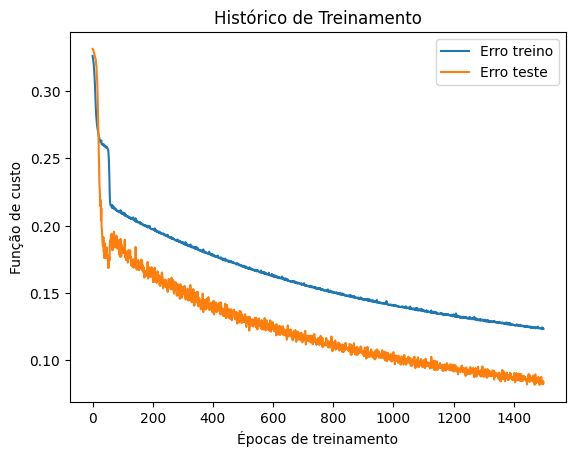

In [43]:
import matplotlib.pyplot as plt
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()

In [45]:
# Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  for toNeuronNum, bias in enumerate(biases):
    print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')
  for fromNeuronNum, wgt in enumerate(weights):
    for toNeuronNum, wgt2 in enumerate(wgt):
      print(f'L{layerNum}N{fromNeuronNum} \ -> L{layerNum+1}N{toNeuronNum} = {wgt2}')

0B -> L1N0: -3.2277982234954834
0B -> L1N1: 0.025330914184451103
0B -> L1N2: 2.618382692337036
L0N0 \ -> L1N0 = 0.3316787779331207
L0N0 \ -> L1N1 = -0.23277880251407623
L0N0 \ -> L1N2 = -0.130522221326828
L0N1 \ -> L1N0 = -2.3919780254364014
L0N1 \ -> L1N1 = 2.3422558307647705
L0N1 \ -> L1N2 = -0.48698872327804565
